In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
df = pd.read_csv('D:\\Downloads\\archive (2)\\spam.csv', encoding='ISO-8859-1')

In [7]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [13]:
df.shape

(5572, 5)

# 1. Data Cleaning #

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
# droping the last 3 col
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace = True)

In [16]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
# renaming the name of the columns 
df.rename(columns = {'v1': 'target', 'v2': 'texts'}, inplace = True)

In [19]:
df

,target,texts
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [11]:
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [25]:
df.head()

,target,texts
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
# values are missing or not
df.isnull().sum()

target    0
texts     0
dtype: int64

In [13]:
#  duplicate values
df.duplicated().sum()
# it contains a lot of duplicate value 

403

In [14]:
# drop duplicates
df = df.drop_duplicates(keep='first')
df.shape

(5169, 2)


# 2. Performing EDA 


In [15]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

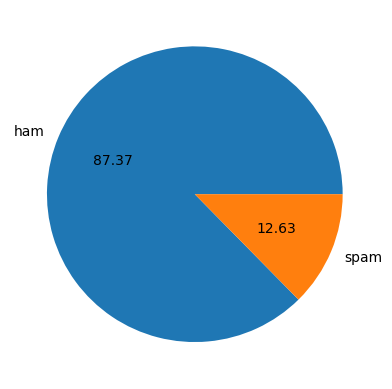

In [16]:
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [ ]:
# the data is slight imbalance

In [17]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
df['num_char'] = df['texts'].apply(len) # storing the num of chars in the text

In [19]:
# counting num of words -> breaking the sms on the basis of words
df['num_words'] = df['texts'].apply(lambda x: len(nltk.word_tokenize(x)))

In [23]:
# counting num of sentance -> breaking the sms on the basis of sentance
df['num_sent'] = df['texts'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

,target,texts,num_char,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [24]:
df.describe()

,target,num_char,num_words,num_sent
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.453279,1.947185
std,0.332253,58.236293,13.324793,1.362406
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,28.000000


In [25]:
# decribing for ham
df[df['target']==0][['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [26]:
# decribing for spam
df[df['target']==1][['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


<AxesSubplot:xlabel='num_char', ylabel='Count'>

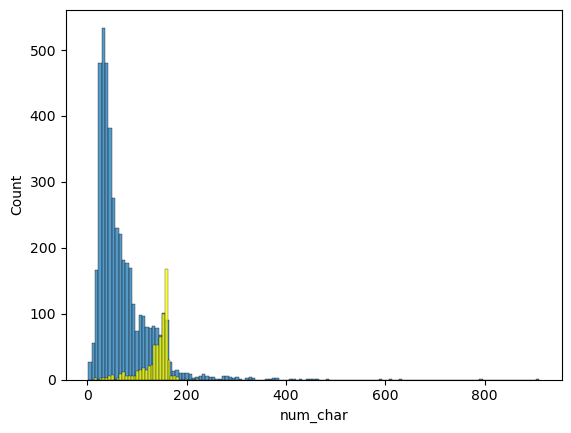

In [27]:
sns.histplot(df[df['target']==0]['num_char'])
sns.histplot(df[df['target']==1]['num_char'], color='yellow')
# num of char of spam is much larger than the ham

<AxesSubplot:xlabel='num_words', ylabel='Count'>

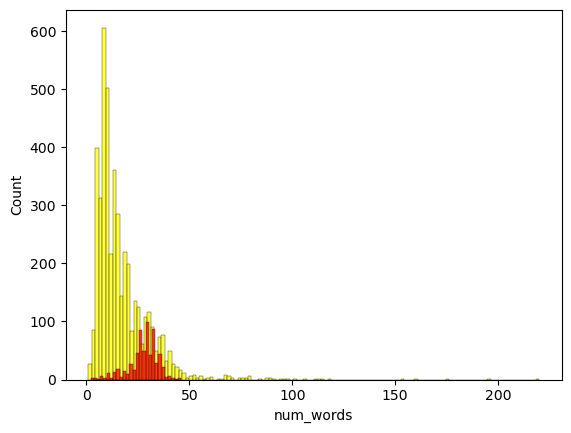

In [65]:
sns.histplot(df[df['target']==0]['num_words'], color='yellow')
sns.histplot(df[df['target']==1]['num_words'], color='red')


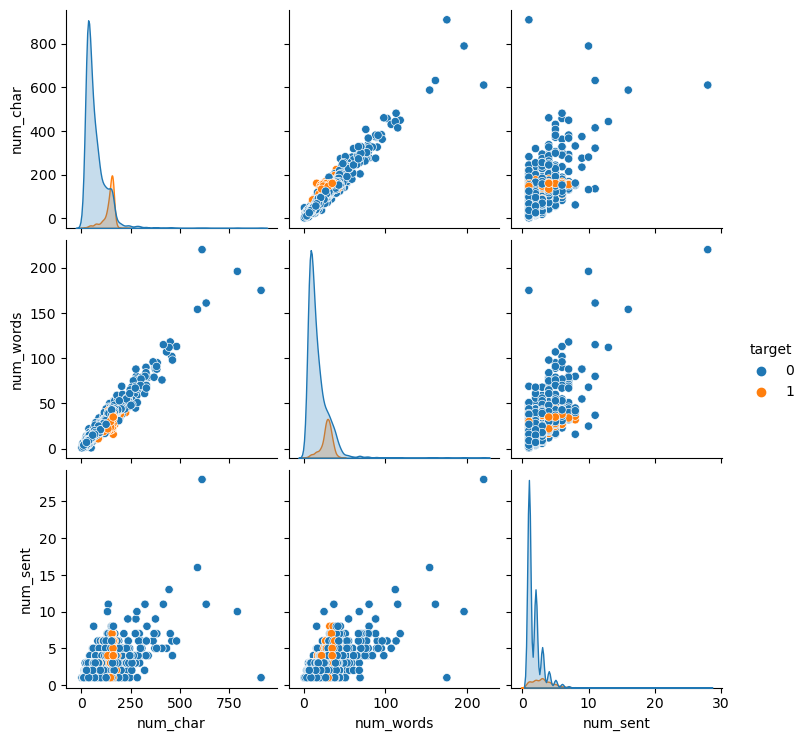

In [28]:
# relationship btw the num_char, num_sent and num_words with each other
sns.pairplot(df, hue='target') 
# the relationship is roughly linear
# it contains outliers in the dataset as we can see 

In [ ]:
sns.heatmap(df.corr(), annot=True)

In [68]:
df.corr()

,target,num_char,num_words,num_sent
target,1.000000,0.384717,0.262984,0.284901
num_char,0.384717,1.000000,0.965770,0.638143
num_words,0.262984,0.965770,1.000000,0.684541
num_sent,0.284901,0.638143,0.684541,1.000000


# 3. Text Preprocessing

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')


In [29]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

nltk.download('punkt')  # Download necessary resources for NLTK (if not already downloaded)

ps = PorterStemmer()

def transform_text(text):
    text = text.lower() # <!-- lower case -->
    text = nltk.word_tokenize(text)  # <!-- tokeniation -->
    
    y = []
    for i in text: # <!-- removing special char -->
        if i.isalnum():
            y.append(i)
    
    text = y[:] # for copy the data from 1 var to another do cloning  
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation: # <!-- removing stop words and punctuation -->
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i)) # steaming ->  removing affixes from a word so that we are left with the stem of that word
                                          # like run, rans, running all convert to run
    
    return " ".join(y)


transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [105]:
df['texts'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [107]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [30]:
df['transformed_text'] = df['texts'].apply(transform_text)
df.head()

,target,texts,num_char,num_words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [32]:
# word clod -> zoom in the important words
from wordcloud import WordCloud
wc = WordCloud(width=1000, height=1000, min_font_size=10, background_color='black')

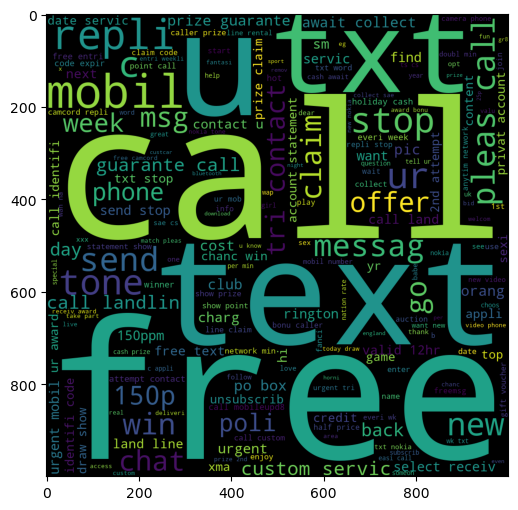

In [33]:
spamWc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spamWc)

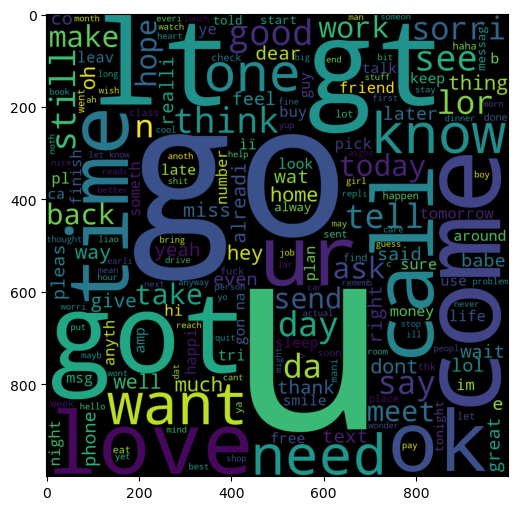

In [34]:
hamWc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(hamWc)

In [36]:
# extracting top 30 words used in ham and spam
spam_text = []
# df[df['target']==1]['transformed_text'].tolist() converting the transformed text of spam in list
for i in df[df['target']==1]['transformed_text'].tolist():
    for word in i.split():
        spam_text.append(word)

In [ ]:
len(spam_text)

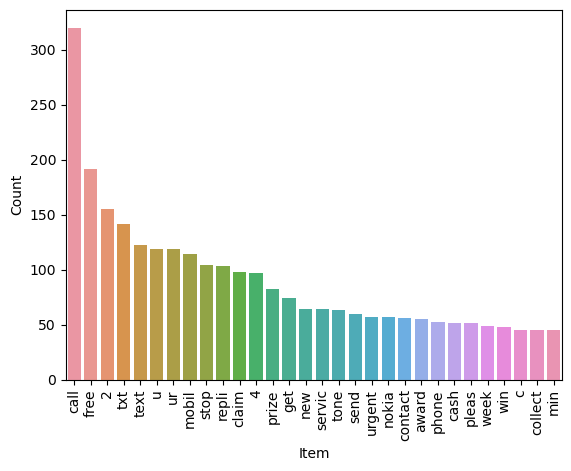

In [37]:
from collections import Counter
counter = Counter(spam_text)

# Get the top 30 most common items and their counts
common_items = counter.most_common(30)

# Create a DataFrame from the common items and specify column names
common_df = pd.DataFrame(common_items, columns=["Item", "Count"])

# Create the barplot
sns.barplot(x="Item", y="Count", data=common_df)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


In [38]:
ham_text = []
# df[df['target']==0]['transformed_text'].tolist() converting the transformed text of ham in list
for i in df[df['target']==0]['transformed_text'].tolist():
    for word in i.split():
        ham_text.append(word)

In [173]:
len(ham_text)

35394

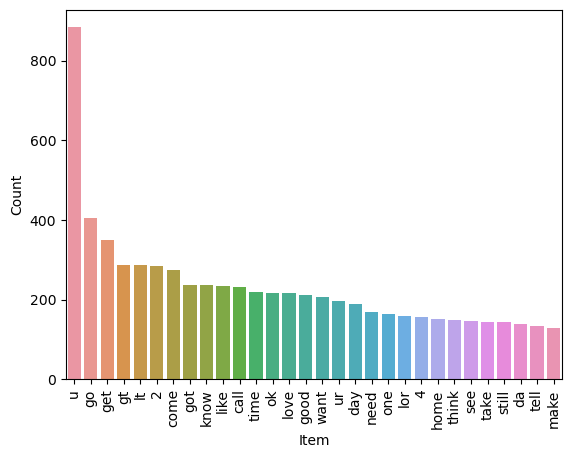

In [39]:
counter_ham = Counter(ham_text)

# Get the top 30 most common items and their counts
common_items_ham = counter_ham.most_common(30)

# Create a DataFrame from the common items and specify column names
common_df_ham = pd.DataFrame(common_items_ham, columns=["Item", "Count"])

# Create the barplot
sns.barplot(x="Item", y="Count", data=common_df_ham)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


# 4. Building Model 

In [ ]:
# performing naive base coz in textual data the naive base performance is best

In [40]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000) # taking only 3000 for better result

In [41]:
X = tfidf.fit_transform(df['transformed_text']).toarray()
X.shape # 5169-> message and 6708-> words 

(5169, 3000)

In [42]:
Y = df['target'].values
Y

array([0, 0, 1, ..., 0, 0, 0])

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)  

In [44]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [45]:
gnb.fit(X_train, Y_train)
ypred1 = gnb.predict(X_test)
print(accuracy_score(Y_test,ypred1))
print(precision_score(Y_test,ypred1))

0.8694390715667312
0.5068493150684932


In [46]:
# we take the tfid-> mnb becsuse this is the imbalace data 
# so we are focusing on precision_score as compared with accuracy 
# and here precision_score is 100%

mnb.fit(X_train,Y_train)
ypred2 = mnb.predict(X_test)
print(accuracy_score(Y_test,ypred2))
print(precision_score(Y_test,ypred2))

0.9709864603481625
1.0


In [47]:
bnb.fit(X_train,Y_train)
ypred3 = bnb.predict(X_test)
print(accuracy_score(Y_test,ypred3))
print(precision_score(Y_test,ypred3))

0.9835589941972921
0.991869918699187


In [58]:
# creating object of algo..

mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

In [59]:
# creating dataframe
clfs = {
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
}

In [60]:
def train_classifier(clf,X_train,y_train,X_test,Y_test):
    clf.fit(X_train,y_train)
    ypred = clf.predict(X_test)
    accuracy = accuracy_score(Y_test,ypred)
    precision = precision_score(Y_test,ypred)
    
    return accuracy,precision

In [56]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    curr_acc,curr_precis = train_classifier(clf, X_train,Y_train,X_test,Y_test)
    
    print("For ",name)
    print("Accuracy - ",curr_acc)
    print("Precision - ",curr_precis)
    
    accuracy_scores.append(curr_acc)
    precision_scores.append(curr_precis)

For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9274661508704062
Precision -  0.8118811881188119
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9748549323017408
Precision -  0.9827586206896551


In [57]:
performance = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision', ascending=False)
performance

,Algorithm,Accuracy,Precision
0,NB,0.970986,1.000000
3,RF,0.974855,0.982759
2,LR,0.958414,0.970297
1,DT,0.927466,0.811881


In [246]:
import pickle
pickle.dump(tfidf, open('vectotizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))